**Importing Required Librairies and setting up the style for out plot**




In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
#setting style for our plot
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

Downloading the data for our portfolio
* We have used stocks like – Apple, Microsoft, JP Morgan, Johnson & Johnson, 20+ Year Treasury Bond ETF, Gold

* We have used the data for the last 3 years (as it is a standard practice)

* Then we have extracted the Adjusted Close price of all these stocks for each day

    * Adjusted Close price – This is the close price after adjusting for adjustment factors. For example:

      * Stock/Reverse Split – When the number of stocks is increased/decreased, making the price of them decrease/increase, respectively

      * Dividends –

          * Cash Dividends – When a part of profit is paid directly to shareholders in cash. Now, this drops the price of the stock on the ex-dividend day. For example, a company whose stock price was 100 gives a dividend of 5; the stock usually opens at 95 the next day.

          * For this we calculate the adjusted factor, the formula being (Close price – dividend) / Close price

          * For our example, the close price would be 95

        * Stock Dividend – Instead of cash, the company gives out more stocks. This proportionally drops the share price as more stocks are now there (Split Effect)

        * The adjustment factor for this is: Adjustment Factor = 1 / (1 + Stock Dividend rate)

      * Rights Offerings – Existing shareholders get the right to buy the share at a lower price, hence the theoretical value of the share drops

      * Spin-Offs – When a division of a company becomes a new independent company, this moves out the assets of the parent company, hence the stock price drops

Note – All of these adjustments are made so that when the stock prices get analyzed, we don't over/underestimate them
  
    
      
          




In [ ]:
print("Donwloading Live market data using yahoo finance")
print("-" * 30)
#This is our Portfolio(Diverified with different asset classes)
tickers=['AAPL','MSFT','JPM','JNJ','TLT','VOO','SPD' ,'GLD']
asset_names=['Apple','Microsoft','JP Morgan','Johnson & Johnson','Long term Bond','Vanguard S&P 500 ETF','Direxion Daily S&P 500 Bear 1X ETF','Gold']
#downloading data for last 3 year

end_date=datetime(2024,12,31)
start_date= end_date-timedelta(days=365*3)#3 years
#Raw data donwlaoding
raw_data=yf.download(tickers,start=start_date,end=end_date)
#Extracting Adj close data
data=raw_data['Adj Close'] if 'Adj Close' in raw_data.columns.get_level_values(0) else raw_data['Close']
#ensuring our data is a Dataframe with tickers as columns
if isinstance(data,pd.Series):
    data=data.to_frame()
returns=data.pct_change().dropna()

Donwloading Live market data using yahoo finance
------------------------------


/tmp/ipython-input-2-3974292530.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data=yf.download(tickers,start=start_date,end=end_date)
[*********************100%***********************]  8 of 8 completed


In [ ]:
print(data.head())

Ticker            AAPL         GLD         JNJ         JPM        MSFT  \
Date                                                                     
2022-01-03  178.645630  168.330002  154.672638  146.291061  325.038086   
2022-01-04  176.378342  169.570007  154.257889  151.836899  319.464630   
2022-01-05  171.686691  169.059998  155.285782  149.060989  307.201019   
2022-01-06  168.820679  166.990005  154.753799  150.644623  304.773529   
2022-01-07  168.987534  167.750000  156.845673  152.137222  304.928894   

Ticker            SPD         TLT         VOO  
Date                                           
2022-01-03  31.527203  128.100311  416.915771  
2022-01-04  31.593622  127.567688  416.744934  
2022-01-05  31.005392  126.875237  408.762573  
2022-01-06  30.957954  127.203674  408.212006  
2022-01-07  30.825129  126.289291  406.797760  


Now we will calculate the returns for our portfolio,I will also explain the three most used and basic types of returns-
  * Simple/Daily Returns(R=(P1-P0)/P0)
      * they basically depict the percentage change in daily returns
      * they are used to understand daily,monthly or returns for a single period
  * Annualized Airthamatic Returns(Mean(Returns)*252(No. of trading days))
      * It estimates expected returns in a short period, irrespective of compunding
  * Annualized Geomteric Returns/CAGR(((*P.end*/*P.start*)^1/n)-1) where n is the time period
      * This is the used metric to understand actual growth of the stock
      * This takes into account the Compounding effect
      * This differs from Arithamatic returns due to Volatality Drag
          * Volatality Drag/Variance drain- This is the differnce between Aithamatic and Geometric mean(Explained in further deatil in the next part)





In [ ]:
print(returns.head())

Ticker          AAPL       GLD       JNJ       JPM      MSFT       SPD  \
Date                                                                     
2022-01-04 -0.012692  0.007367 -0.002681  0.037910 -0.017147  0.002107   
2022-01-05 -0.026600 -0.003008  0.006663 -0.018282 -0.038388 -0.018619   
2022-01-06 -0.016693 -0.012244 -0.003426  0.010624 -0.007902 -0.001530   
2022-01-07  0.000988  0.004551  0.013517  0.009908  0.000510 -0.004291   
2022-01-10  0.000116  0.003040 -0.004944  0.000957  0.000732 -0.002462   

Ticker           TLT       VOO  
Date                            
2022-01-04 -0.004158 -0.000410  
2022-01-05 -0.005428 -0.019154  
2022-01-06  0.002589 -0.001347  
2022-01-07 -0.007188 -0.003464  
2022-01-10  0.002461 -0.001306  


In [ ]:
#Summarizing our data
print("-" * 30)
print(f'Data Has been downloaded for: {",".join(asset_names)}')
print(f'Data Range: {data.index[0].date()} to {data.index[-1].date()}')
print(f'total observations:{len(returns)}')

print("-" * 30)

print('Expected Returns and Risk')
airthematic_returns=returns.mean()*252
geometric_returns={}
for ticker in tickers:
    total_return=(data[ticker].iloc[-1]/data[ticker].iloc[0]) - 1
    years=len(returns)/252
    geometric_returns[ticker]=(1+total_return)**(1/years) - 1

expected_returns=pd.Series(geometric_returns)

print("\nExpected Annual Returns(Geometric):")
for ticker, name , ret in zip(tickers,asset_names,expected_returns):
    print(f'{name:40}({ticker}): {ret:6.2%}')

------------------------------
Data Has been downloaded for: Apple,Microsoft,JP Morgan,Johnson & Johnson,Long term Bond,Vanguard S&P 500 ETF,Direxion Daily S&P 500 Bear 1X ETF,Gold
Data Range: 2022-01-03 to 2024-12-30
total observations:751
------------------------------
Expected Returns and Risk

Expected Annual Returns(Geometric):
Apple                                   (AAPL): 12.18%
Microsoft                               (MSFT):  9.26%
JP Morgan                               (JPM): 17.32%
Johnson & Johnson                       (JNJ): -3.06%
Long term Bond                          (TLT): -12.54%
Vanguard S&P 500 ETF                    (VOO):  8.90%
Direxion Daily S&P 500 Bear 1X ETF      (SPD):  2.06%
Gold                                    (GLD): 12.74%


**Volatality Drag/Variance Drain-** they are in very basic terms,just the differnce between airthamatic and geometric returns
  * For example, A stock worth ₹100 today, becomes ₹200 after 2 years(a 100%    gain) but then that stock becomes ₹100 after 2 year(50% loss)
    * The Arithmetic return over 2 years is 25% = (100% - 50%) / 2
    * The Geometric return over 2 years is is 0% = $100 (final value) - $100 (starting value)
  
**More the volatality lower the geometric returns**\
*An excel model has been created for the same to understand the concept*\
  * the gross gain is same in all three cases, but overtime the portfolio with the highest volatality, looses the most


<iframe src="https://docs.google.com/spreadsheets/d/your_sheet_id_here/edit?usp=sharing"
        width="1000" height="600"></iframe>
        


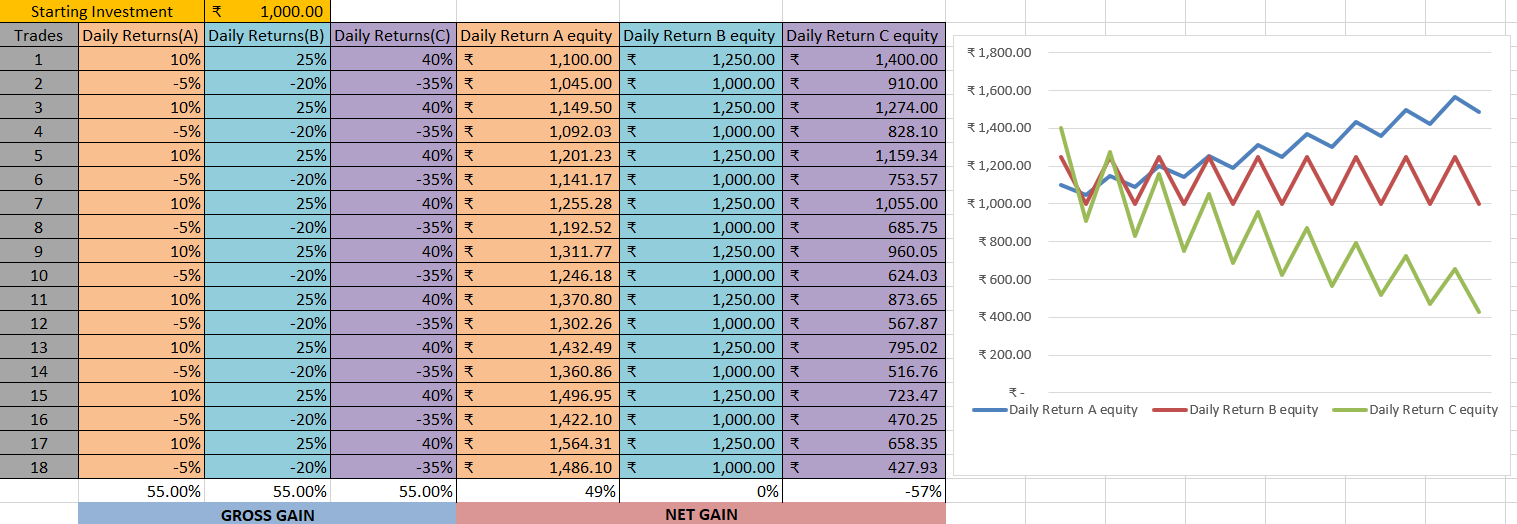

We are going to comapare expected returns (Airithamatic vs Geometric)

In [ ]:
print("\nComparison- Airthamatic VS Geometric Returns:")
print(f"{'Asset':15}{'Arithmatic':>12}{'Geometric':>12}{'Differnce':>12}")
print("-" * 30)
for ticker in tickers:
    arithm=airthematic_returns[ticker]
    geom=geometric_returns[ticker]
    diff= arithm-geom#this differnce here reffers to volatality drag
    print(f"{ticker:15}{arithm:11.2%}{geom:11.2%}{diff:11.2%}")


Comparison- Airthamatic VS Geometric Returns:
Asset            Arithmatic   Geometric   Differnce
------------------------------
AAPL                15.15%     12.18%      2.98%
MSFT                12.66%      9.26%      3.40%
JPM                 19.09%     17.32%      1.77%
JNJ                 -1.77%     -3.06%      1.29%
TLT                -11.81%    -12.54%      0.73%
VOO                 10.05%      8.90%      1.15%
SPD                  2.94%      2.06%      0.88%
GLD                 13.05%     12.74%      0.31%


**As we can see, Gold has just .31% drag, it shows how it is a stable asset to invest in**

We are gonna calculate annualized variance,standard deviations for understanding annual risk

In [ ]:
#Annualized Variance and std dev
variance=returns.var()*252
std_dev=returns.std()*np.sqrt(252)
print("\nAnnual Risk(Standard Deviations)")
for ticker,name,std in zip(tickers,asset_names,std_dev):
    print(f'{name:40}({ticker}):{std:6.2%}')


Annual Risk(Standard Deviations)
Apple                                   (AAPL):27.11%
Microsoft                               (MSFT):14.57%
JP Morgan                               (JPM):16.38%
Johnson & Johnson                       (JNJ):25.01%
Long term Bond                          (TLT):27.59%
Vanguard S&P 500 ETF                    (VOO):13.42%
Direxion Daily S&P 500 Bear 1X ETF      (SPD):17.80%
Gold                                    (GLD):17.48%


Corealtion Matrix and Visualizing it


===COREALTION ANALYSIS===


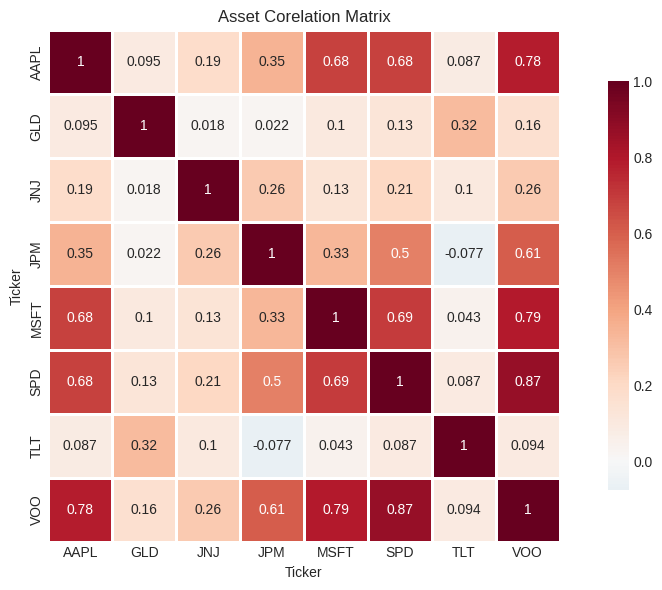

In [ ]:
#Corelation matrix
print("\n===COREALTION ANALYSIS===")
corealtion_matrix=returns.corr()
#visualizing
plt.figure(figsize=(10,6))
sns.heatmap(corealtion_matrix,annot=True,cmap='RdBu_r',center=0,square=True,
            linewidths=1,cbar_kws={'shrink':0.8})
plt.title("Asset Corelation Matrix")
plt.tight_layout()
plt.savefig('Corelation_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

*From this matrix, we can understand how differnet assets work with respect to other assets*\
in our case, the portfolio is *not well diversifed* although it has Gold and Long term bonds which has a weak co realtion with the equity, but all the selcted equities are strongly corelated, hence they depend on the overall macroeconomic growth\
*hence the portfolio should be more diversified in terms of equities*



Studying Two asset portfolio(AAPL and TLT(bond))

In [ ]:
print("\n=== TWO-ASSET PORTFOLIO CALCULATIONS ===")
#using AAPL and TLT(Bond)
#Assigning them weights
w_stock=0.6
w_bond=0.4

port_returns=w_stock*expected_returns['AAPL']+w_bond*expected_returns['TLT']

#Portfolio Varaince
corelation_AAPL_TLT=corealtion_matrix.loc['AAPL','TLT']
cov_AAPL_TLT=corelation_AAPL_TLT*std_dev['AAPL']*std_dev['TLT']

port_variance=((w_stock**2 * variance['AAPL'])
               +(w_bond**2 * variance['TLT'])
               +(2*w_stock*w_bond * cov_AAPL_TLT)
                )
port_std_dev=np.sqrt(port_variance)
#Summarizing results
print(f'60/40 Stock-Bond Portfolio:')
print(f'Expected Returns:{port_returns:.2%}')
print(f'Portfolio Risk:{port_std_dev:.2%}')


=== TWO-ASSET PORTFOLIO CALCULATIONS ===
60/40 Stock-Bond Portfolio:
Expected Returns:2.29%
Portfolio Risk:18.31%


**Understanding the diversification bennefit**
  * *Naive risk (or weighted average risk)*- is the simple sum of each asset’s individual standard deviation, weighted by its allocation in the portfolio — but ignoring correlations between them.\
  We ignore the corwealtion, becuase *Naive risk* is a **benchmark**- what can be the worse outcome in case of no diversifaction
  * *Diversification Benefit*- it is the diffenrce between Naive risk(no corealtion assumed) and the portfolio risk(which accounts for co-relation)\
  hence, it tell how much differnce did the diversifaction made.


In [ ]:
naive_risk=w_stock*std_dev['AAPL']+w_bond*std_dev['TLT']
div_benefit= naive_risk-port_std_dev

print(f"\nDiversification Benefit: {div_benefit:.2%} reduction in risk")
print(f" (Actual risk {port_std_dev:.2%} vs Weighted average {naive_risk:.2%})")


Diversification Benefit: 5.07% reduction in risk
 (Actual risk 18.31% vs Weighted average 23.39%)


Simulating Effecient Fronteir

**Effecient Fronteir** is a simulation where we run n numbers of simulations with different weights to our assets, then we plot them using a scatter plot\
Then we get most optimal portfolio where the *sharpe* ratio is maximium
  * Sharpe ratio-it shows the risk adjusted returns\
   how much extra returns does a portfolio generate for each unit of risk taken



In [ ]:
print("\n=== Input values for our simulation ===")
cov_matrix_annual=returns.cov()*252
n_portfolios=10000
n_assets=len(tickers)

weights=np.random.random((n_portfolios,n_assets))
weights /= weights.sum(axis=1)[:,np.newaxis]

portfolio_returns=np.dot(weights,expected_returns)
portfolio_risk=np.sqrt(np.diag(np.dot(weights,np.dot(cov_matrix_annual,weights.T))))

sharpe_ratios= portfolio_returns/portfolio_risk
max_sharpe_idx=np.array(sharpe_ratios).argmax()
min_risk_idx=np.array(portfolio_risk).argmin()

print(f"\nNumber of simulations done:{n_portfolios}")



=== Input values for our simulation ===

Number of simulations done:10000


Plotting the simualtion


=== EFFECIENT FRONTEIR SIM ===


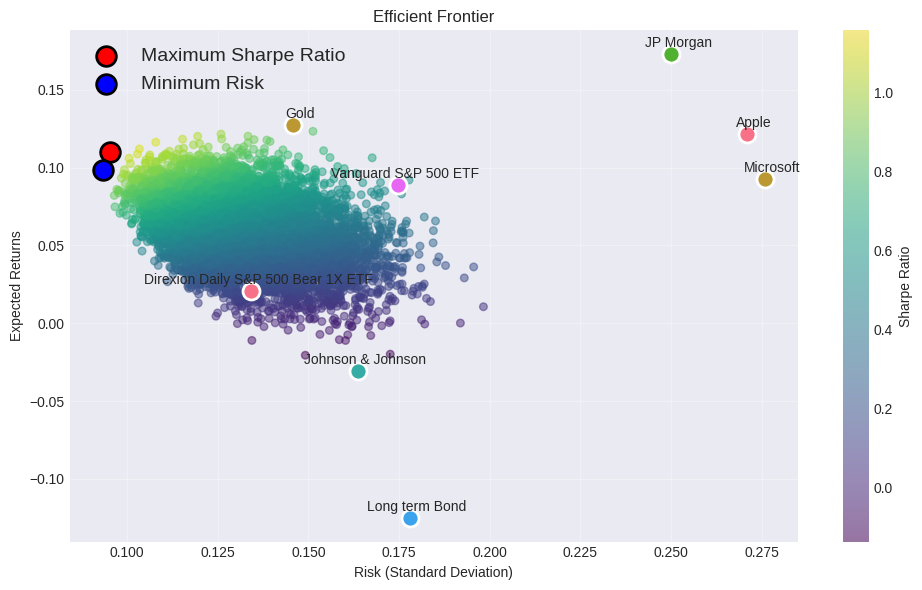

In [ ]:
print("\n=== EFFECIENT FRONTEIR SIM ===")
plt.figure(figsize=(10,6))
scatter = plt.scatter(portfolio_risk, portfolio_returns, c=sharpe_ratios,
                      cmap='viridis', alpha=0.5, s=30 )
plt.colorbar(scatter, label='Sharpe Ratio')
plt.scatter(portfolio_risk[max_sharpe_idx], portfolio_returns[max_sharpe_idx],
            c='red', s=200, edgecolors='black', linewidths=2, label='Maximum Sharpe Ratio')
plt.scatter(portfolio_risk[min_risk_idx], portfolio_returns[min_risk_idx],
            c='blue', s=200, edgecolors='black', linewidths=2, label='Minimum Risk')
for i, (ticker,name) in enumerate(zip(tickers,asset_names)):
    plt.scatter(std_dev[ticker], expected_returns[ticker],
                 s=150, edgecolors='white', linewidths=2)
    plt.annotate(name, (std_dev[ticker], expected_returns[ticker]),
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=10)


plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend(loc='upper left',fontsize=14)
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.savefig('Efficient_Frontier.png', dpi=300, bbox_inches='tight')
plt.show()

Providing Weights to this portfolio\
On the basis of our fndings in the effecient portfolio simulaton

In [ ]:
print("\n=== OPTIMAL PORTFOLIO WEIGHTS ===")
print("\nMaximum Sharpe Ratio Portfolio:")
for ticker,weight in zip(tickers, weights[max_sharpe_idx]):

      print(f'{ticker:10}: {weight:6.2%}')
print(f"expected return: {portfolio_returns[max_sharpe_idx]:.2%}")
print(f"risk: {portfolio_risk[max_sharpe_idx]:.2%}")
print(f'sharpe ratio: {sharpe_ratios[max_sharpe_idx]:.3f}')


=== OPTIMAL PORTFOLIO WEIGHTS ===

Maximum Sharpe Ratio Portfolio:
AAPL      :  2.08%
MSFT      : 22.53%
JPM       : 31.10%
JNJ       :  0.20%
TLT       :  0.51%
VOO       : 30.54%
SPD       :  9.75%
GLD       :  3.29%
expected return: 10.99%
risk: 9.51%
sharpe ratio: 1.156


Let's see the minimum risk portfolio

In [ ]:
print("\nMinimum Risk Portfolio:")
for ticker,weight in zip(tickers, weights[min_risk_idx]):

        print(f'{ticker:10}: {weight:6.2%}')
print(f"expected return: {portfolio_returns[min_risk_idx]:.2%}")
print(f"risk: {portfolio_risk[min_risk_idx]:.2%}")


Minimum Risk Portfolio:
AAPL      :  1.77%
MSFT      : 31.36%
JPM       : 24.91%
JNJ       :  0.38%
TLT       :  2.51%
VOO       : 28.35%
SPD       : 10.59%
GLD       :  0.13%
expected return: 9.86%
risk: 9.32%


risk return profile comparison

<Figure size 1000x600 with 0 Axes>

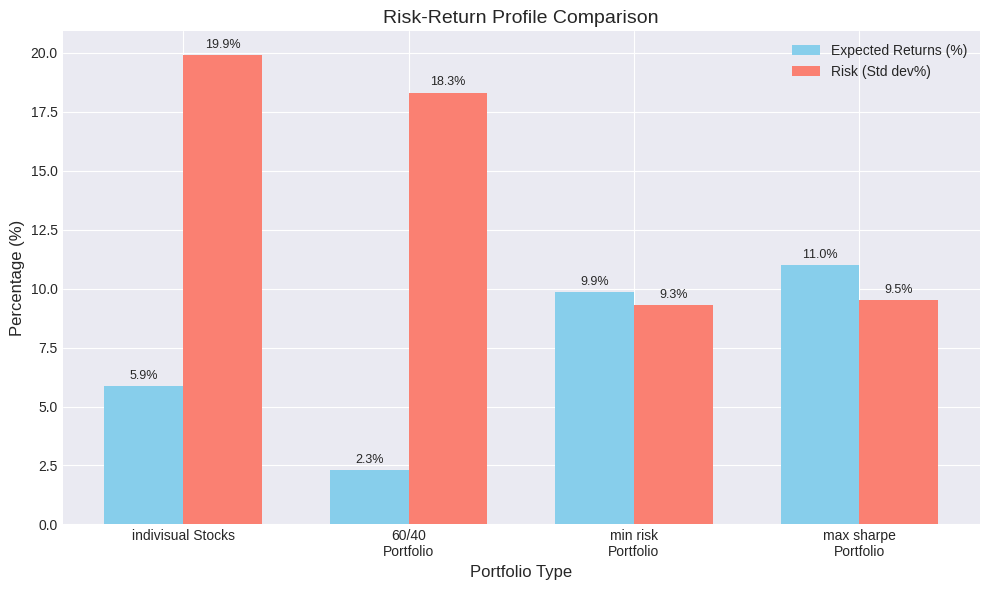

In [ ]:
plt.figure(figsize=(10,6))
categories=['indivisual Stocks','60/40\nPortfolio','min risk\nPortfolio','max sharpe\nPortfolio']
returns_compare=[expected_returns[['AAPL','MSFT','JPM','JNJ','TLT','VOO','SPD' ,'GLD']].mean(),
                 port_returns,
                 portfolio_returns[min_risk_idx],
                 portfolio_returns[max_sharpe_idx]]
risk_compare=[std_dev[['AAPL','MSFT','JPM','JNJ','TLT','VOO','SPD' ,'GLD']].mean(),
              port_std_dev,
              portfolio_risk[min_risk_idx],
              portfolio_risk[max_sharpe_idx]]
x=np.arange(len(categories))
width=0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, np.array(returns_compare) * 100, width, label='Expected Returns (%)', color='skyblue')

bars2 = ax.bar(x + width/2, np.array(risk_compare) * 100, width, label='Risk (Std dev%)', color='salmon')

ax.set_xlabel('Portfolio Type',fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Risk-Return Profile Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('Risk_Return_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n=== OPTIMAL PORTFOLIO WEIGHTS(Max Sharpe) ===")
optimal_weights=[]
for ticker,weight in zip(tickers, weights[max_sharpe_idx]):
            print(f'{ticker:10}: {weight:6.2%}')
            optimal_weights.append(weight)
optimal_portfolio_returns=(returns *optimal_weights).sum(axis=1)



=== OPTIMAL PORTFOLIO WEIGHTS(Max Sharpe) ===
AAPL      :  2.08%
MSFT      : 22.53%
JPM       : 31.10%
JNJ       :  0.20%
TLT       :  0.51%
VOO       : 30.54%
SPD       :  9.75%
GLD       :  3.29%


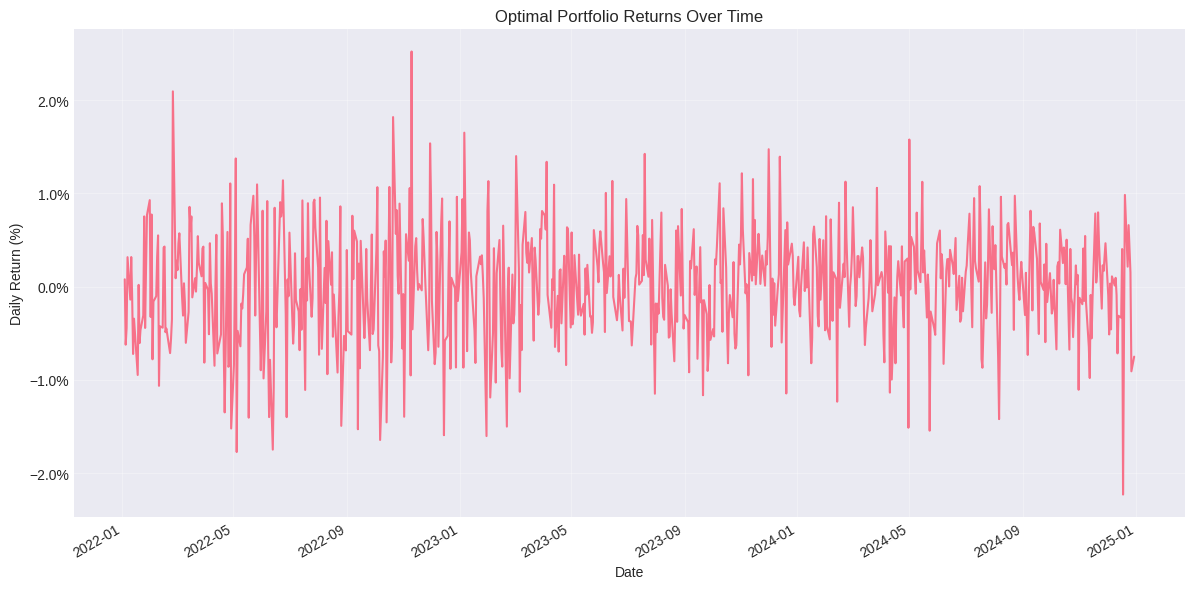

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(12, 6))
ax = optimal_portfolio_returns.plot(title='Optimal Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Format y-axis as percentage
formatter = mticker.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
annual_volatility = optimal_portfolio_returns.std() * np.sqrt(252)
print(f'{annual_volatility:.3%}')


9.510%
